# Importing Libraries


In [ ]:
!nvidia-smi

Mon May  8 18:41:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Clone the repo
!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git

Cloning into 'YOLOv8-DeepSORT-Object-Tracking'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 403 (delta 21), reused 19 (delta 19), pack-reused 370
Receiving objects: 100% (403/403), 77.99 MiB | 14.86 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [ ]:
!pwd
%cd /content/YOLOv8-DeepSORT-Object-Tracking

/content
/content/YOLOv8-DeepSORT-Object-Tracking


In [ ]:

# Pip install (recommended)

!pip install -e '.[dev]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


##To implement the DeepSORT tracking, downloading the required files 

In [ ]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 144MB/s]


In [ ]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

# Creating train-val split

In [ ]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:

%cd /content/drive/MyDrive/edi_model/
!pwd

/content/drive/MyDrive/edi_model
/content/drive/MyDrive/edi_model


In [ ]:
!unzip tdata.zip


Streaming output truncated to the last 5000 lines.
  inflating: tdata/labels/train/1301.txt  
  inflating: tdata/labels/train/1303.txt  
  inflating: tdata/labels/train/1306.txt  
  inflating: tdata/labels/train/1308.txt  
  inflating: tdata/labels/train/1311.txt  
  inflating: tdata/labels/train/1318.txt  
  inflating: tdata/labels/train/1319.txt  
  inflating: tdata/labels/train/132.txt  
  inflating: tdata/labels/train/1322.txt  
  inflating: tdata/labels/train/1323.txt  
  inflating: tdata/labels/train/1326.txt  
  inflating: tdata/labels/train/1327.txt  
  inflating: tdata/labels/train/133.txt  
  inflating: tdata/labels/train/1330.txt  
  inflating: tdata/labels/train/1331.txt  
  inflating: tdata/labels/train/1332.txt  
  inflating: tdata/labels/train/1333.txt  
  inflating: tdata/labels/train/1335.txt  
  inflating: tdata/labels/train/1337.txt  
  inflating: tdata/labels/train/1340.txt  
  inflating: tdata/labels/train/1347.txt  
  inflating: tdata/labels/train/1348.txt  
  inf

In [ ]:
train_path_img = "/tdata/images/train/"
train_path_label = "./tdata/labels/train/"
val_path_img = "./tdata/images/val/"
val_path_label = "./tdata/labels/val/"
test_path = "./tdata/test"

In [ ]:
# '''
# Split the dataset into train and test and creates the train.txt and test.tx with
# the respective path of the images in each folder
# '''

# def train_test_split(path,neg_path=None, split = 0.2):
#     print("------ PROCESS STARTED -------")


#     files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images
    

#     print (f"--- This folder has a total number of {len(files)} images---")
#     random.seed(42)
#     random.shuffle(files)

#     test_size = int(len(files) * split)
#     train_size = len(files) - test_size

#     ## creating required directories

#     os.makedirs(train_path_img, exist_ok = True)
#     os.makedirs(train_path_label, exist_ok = True)
#     os.makedirs(val_path_img, exist_ok = True)
#     os.makedirs(val_path_label, exist_ok = True)

    
#     ### ----------- copying images to train folder
#     for filex in tqdm(files[:train_size]):
#       if filex == 'classes':
#           continue
#       shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
#       shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')
        
    

#     print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")
    
#     if neg_path:
#         neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
#         for filex in tqdm(neg_images):
#             shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')
            
#         print(f"------ Total  {len(neg_images)} negative images added to the training data -------")
    
#         print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")
    


#     ### copytin images to validation folder
#     for filex in tqdm(files[train_size:]):
#       if filex == 'classes':
#           continue
#       # print("running")
#       shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
#       shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

#     print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")
    
#     print("------ TASK COMPLETED -------")

# ## spliting the data into train-test and creating train.txt and test.txt files
# # train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

# ### for label_tag
# train_test_split('/content/drive/MyDrive/edi_model/data/') ### without negative images
# # train_test_split('./data/','./negative_images/') ### if you want to feed negative images

In [ ]:
!pip install ultralytics

ModuleNotFoundError: ignored

In [ ]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'
dataset = '/content/drive/MyDrive/edi_model/dataset.yaml'

In [ ]:
!unzip 

# Command Line Interface:


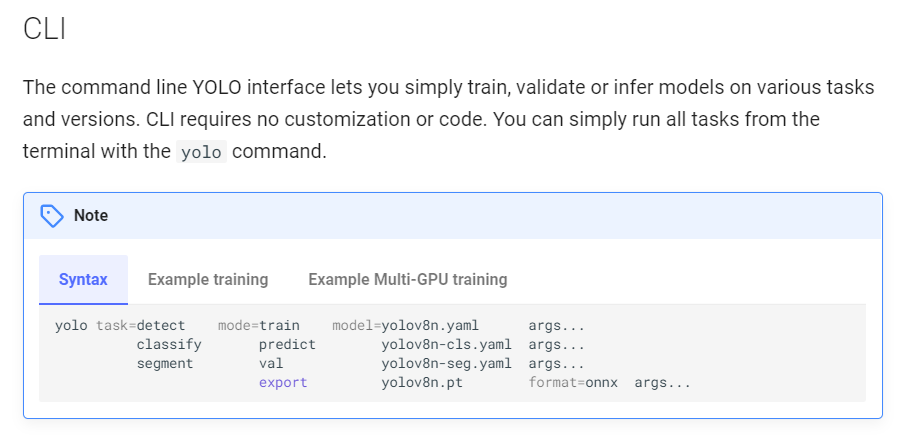

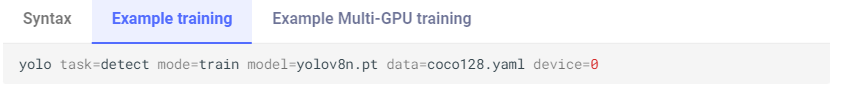

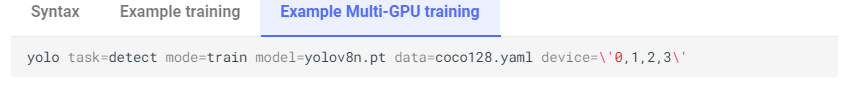

## Training

In [ ]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'
dataset = ''

In [ ]:
#!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/edi_model/dataset.yaml epochs=50 imgsz=640 batch=8 project=/content/drive/MyDrive/edi_model/training_results name=Pomegranate 

new to train for deepsort

In [ ]:
%cd {HOME}

!python train.py model=yolov8l.pt data=/content/dataset.yaml epochs=70 imgsz=640

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/dataset.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.93

## Checking files


In [ ]:
!ls /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train

In [ ]:
!cp /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/ /content/drive/MyDrive/edi_model/train/

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/edi_model/training_results_1/Pomegranate

Check train folders here

In [ ]:
from IPython.display import Image

In [ ]:
Image(filename = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/confusion_matrix.png')

In [ ]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/results.png', width = 600)

# validation


In [ ]:
!pwd

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
!python val.py model='/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/weights/best.pt' data='/content/dataset.yaml'

## Inferencing

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/edi_model/training_results_1/Pomegranate/weights/best.pt conf=0.70 source=/content/drive/MyDrive/edi_model/test_images

In [ ]:
!pip install deep-sort-realtime


In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/edi_model/output

cp: cannot stat '/content/runs/detect/predict': No such file or directory


### inferencing on video


In [ ]:
#!yolo task=detect mode=predict model=/content/drive/MyDrive/edi_model/training_results/Pomegranate/weights/best.pt conf=0.77 source=/content/drive/MyDrive/yolov8/vid2

In [ ]:
#!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/edi_model/output

In [ ]:
# !yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt conf=0.5 source=/content/drive/MyDrive/yolov8/videos

In [ ]:
# !cp -r /content/runs/detect/predict3 /content/drive/MyDrive/yolov8/output

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/edi_model/training_results/Pomogrenate/weights/best.pt 